<h2> Part C <h2>

In [25]:
import numpy as np

In [26]:
def polynomial_features(x, p,intercept=False):

    """ 
    Generates a polynomial feature matrix with or without
    intercept, based on the values of x. 

    Returns
    -------
    X : numpy vector shape(n,p), if intercept shape(n,p+1)
        the resulting feature matrix of all polynomial combinations
        up to a given degree. Vandermonde format.
    

    Parameters
    ----------
    x : numpy vector shape(n)
        x values from dataset

    p : int
        number of degrees 

    intercept : Bool
        Bool to determine if intercept should be included or not:
        False : no intercept 
        True : include intercept
    """
    
    n = len(x)

    #handling the intercept column
    #to avoid branching in loop
    if intercept: 
        matrix_p = p+1
        start_col = 1
        i_offs = 0

        X = np.zeros((n, matrix_p))
        X[:,0] = np.ones(n)
   
    else:
        matrix_p = p
        start_col = 0
        i_offs = 1
    
        X = np.zeros((n, matrix_p))
    
    for i in range(start_col,matrix_p):
            X[:,i] = np.power(x,i+i_offs)
     
    return X

In [27]:
def OLS_parameters(X, y):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method.  

        Theta_OLS = inv(X.T @ X) @ X.T @ y

        Returns
        -------
        theta : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """

    #calculate X^T*X and take the inverse
    XTX = X.T@X
    XTX_i = np.linalg.inv(XTX)

    #calculate X^T*y
    XT_y = X.T @ y
    
    #calculate theta
    theta = XTX_i @ XT_y
    
    return theta

In [28]:
def Ridge_parameters(X, y, lamb):
    """
        Calculates the optimal parameters, r_params, using the 
        ridge regression method.  

        r_params = inv(X.T @ X + lambda I) @ X.T @ y

        Returns
        -------
        r_params : numpy array shape (n)
            the optimal parameters, theta as given by the
            Ridge regression method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """
        
    # Assumes X is scaled and has no intercept column    
    
    p = X.shape[1]
    I = np.eye(p)

    r_params = np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y

    return r_params

In [29]:
def gradient_descent_ridge(X,y,eta,lam,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ridge regression and gradient descent

        Returns
        -------
        theta_gdRidge : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """

    # Initialize weights for gradient descent
    theta_gdRidge = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for Ridge
        grad_Ridge = (2.0/n) * X.T @(X @ theta_gdRidge - y) + 2*lam*theta_gdRidge

        # Update parameters theta
        theta_gdRidge -= eta*grad_Ridge 

    # After the loop, theta contains the fitted coefficients
    return theta_gdRidge

In [30]:
def gradient_descent_OLS(X,y,eta,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method and gradient descent

        Returns
        -------
        theta_gdOLS : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """
    
    # Initialize weights for gradient descent
    theta_gdOLS = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for OSL and Ridge
        grad_OLS = (2.0/n)*X.T @ (X @ theta_gdOLS - y)

        # Update parameters theta
        theta_gdOLS -= eta*grad_OLS

    # After the loop, theta contains the fitted coefficients
    return theta_gdOLS

In [31]:
def runge_function(x):
    """
        The Runge function, f(x) = 1/(1+25*x^2)

        Returns
        -------
        f : numpy array shape (n)
            the Runge function evaluated at each point in x

        Parameters
        ----------
        x : numpy array shape (n)
            x values from dataset
    """

    f = 1/(1+25*x**2) 

    return f

np.random.seed(0) # For reproducibility
# Generate synthetic data
n = 100
x = np.linspace(-1, 1, n)
y = runge_function(x) + 0.1 * np.random.randn(n)

In [32]:
# Generate polynomial features
degree = 5 # Degree of the polynomial features
X = polynomial_features(x,degree,intercept=True) # Generate polynomial features
n_features = X.shape[1] # Number of features

# Hyperparameters
eta_list = [0.001, 0.01, 0.1, 0.5, 1] # Learning rates to test
num_iters = 1000 # Number of iterations for gradient descent
lamb = 0.1 # Regularization parameter for Ridge

results = {} # Dictionary to store results

# Perform gradient descent for each eta and compare with OLS and Ridge

for eta in eta_list: # Loop over each learning rate
    theta_gdOLS = gradient_descent_OLS(X, y, eta, num_iters, n_features)
    theta_gdRidge = gradient_descent_ridge(X, y, eta, lamb, num_iters, n_features)
    theta_OLS = OLS_parameters(X, y)
    theta_Ridge = Ridge_parameters(X, y, lamb)

    results[eta] = {
        'theta_gdOLS': theta_gdOLS,
        'theta_gdRidge': theta_gdRidge,
        'theta_OLS': theta_OLS,
        'theta_Ridge': theta_Ridge
    }

# Print the results
for eta, params in results.items():
    print(f"Results for eta = {eta}:")
    print(f"  Gradient Descent OLS Parameters: {params['theta_gdOLS']}")
    print(f"  Gradient Descent Ridge Parameters: {params['theta_gdRidge']}")
    print(f"  OLS Parameters: {params['theta_OLS']}")
    print(f"  Ridge Parameters: {params['theta_Ridge']}\n")

Results for eta = 0.001:
  Gradient Descent OLS Parameters: [ 0.24269139 -0.00626545 -0.02047827 -0.00326185 -0.01677792 -0.00296296]
  Gradient Descent Ridge Parameters: [ 0.22646114 -0.00577556 -0.01647982 -0.00302035 -0.01396908 -0.00273419]
  OLS Parameters: [ 0.62930554 -0.08291809 -2.14154267  0.29736638  1.8125738  -0.25555585]
  Ridge Parameters: [ 0.58044407 -0.04131374 -1.71638535  0.11813179  1.34988738 -0.10256581]

Results for eta = 0.01:
  Gradient Descent OLS Parameters: [ 4.19761302e-01 -1.20847155e-02 -3.56043216e-01 -1.07008629e-04
 -1.09625616e-01 -5.23156150e-03]
  Gradient Descent Ridge Parameters: [ 0.32039495 -0.00895849 -0.17201815 -0.00236766 -0.07671639 -0.00397566]
  OLS Parameters: [ 0.62930554 -0.08291809 -2.14154267  0.29736638  1.8125738  -0.25555585]
  Ridge Parameters: [ 0.58044407 -0.04131374 -1.71638535  0.11813179  1.34988738 -0.10256581]

Results for eta = 0.1:
  Gradient Descent OLS Parameters: [ 0.52387539 -0.02227376 -1.1972479   0.03530517  0.77

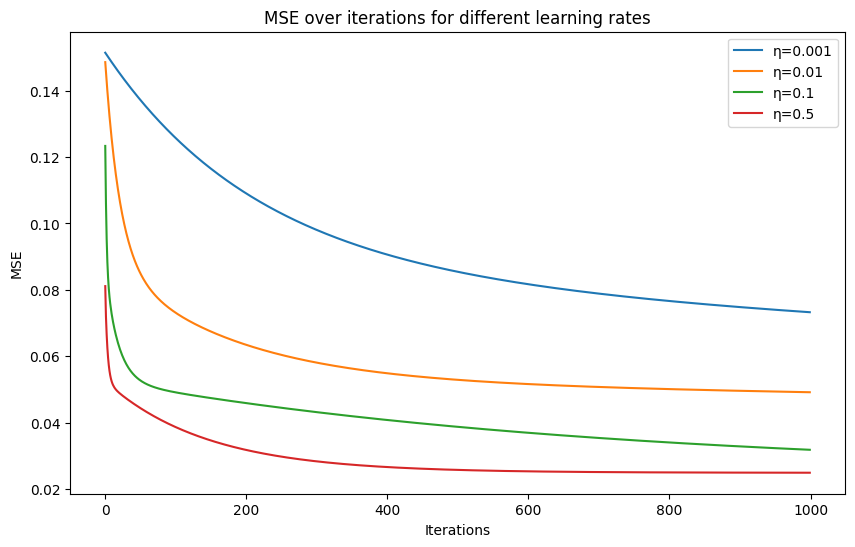

In [37]:
etas = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(10,6))

for eta in etas:
    theta = np.zeros(n_features)
    mse_history = []
    for t in range(num_iters):
        grad = (2.0/len(y)) * X.T @ (X @ theta - y)
        theta -= eta * grad
        mse_history.append(np.mean((X @ theta - y) ** 2))
    
    plt.plot(range(num_iters), mse_history, label=f"η={eta}")

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("MSE over iterations for different learning rates")
plt.legend()
plt.show()


In this part we replaced the expressions for the optimal parameters  from and Ridge with our own gradient decent code. With moderate from 0.01 to 
0.1 we got a MSE that matched well with the closed-form. A low of 0.001 gave us a very slow convergence, while a high gave a spike in the graph for values from 0.5 to 1. So this shows us that the gradient decent works, but the is critical, where its important to choose the "sweet spot" to avoid slow convergence or unstability.